In [1]:
import numpy as np
import os
from astropy.io import fits
import matplotlib.pyplot as plt

import paco.processing.paco as p
import paco.processing.fullpaco as f_paco
import paco.processing.fastpaco as fastPACO

from paco.util.util import *
import cv2 as cv2
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D

from matplotlib.colors import LogNorm 
fp = fastPACO.FastPACO(patch_size = 5)
%matplotlib notebook


In [2]:
path_data = os.path.dirname(os.getcwd()) + '/PACO/testData/'
print(path_data)
angles = np.loadtxt(os.path.join(path_data, "parang.txt"))
print(len(angles))


/home/evert/Documents/PACO/PACO/testData/
230


(230, 60, 60)
(60, 60)


/home/evert/.local/share/virtualenvs/PACO-4ds6DMDq/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/home/evert/.local/share/virtualenvs/PACO-4ds6DMDq/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


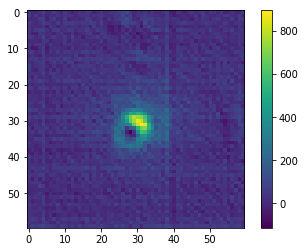

In [3]:
data = fits.getdata(os.path.join(path_data, "stack100_rad1.6as.fits"))[:,:-1,:-1]
print(np.shape(data))
plt.imshow(data[0].T)
print(np.shape(data[0]))
plt.colorbar()

## Full PACO 

In [4]:
#fp = f_paco.FullPACO(patch_size = 49)

In [5]:
#fp.setImageSequence(rot_images)
#a,b = fp.PACO(angles,scale = 1)

In [6]:
#phi0s = np.array([[30,30]])
#a,b = fp.PACO(angles)


In [7]:
#img = b/np.sqrt(a)
#plt.imshow(img, origin='lower')

#clb = plt.colorbar()
#clb.ax.set_title('SNR')

In [8]:
#plt.imshow(1/np.sqrt(a), origin='lower')

#clb = plt.colorbar()

Notes: 

As the signal of the source increases, it pushes a_ij and b_ij towards 0
Both a and b are rotated 90 degrees from the source image.

In [9]:
#plt.imshow(b.T, origin='lower')

#clb = plt.colorbar()

## Fast PACO

In [10]:
fp = fastPACO.FastPACO(angles = angles,
                      patch_size = 49)
fp.setImageSequence(data)
a,b = fp.PACO(model_params = {"sigma":2})

Precomputing Statistics...
Running PACO...
Done


Text(0.5,1,'SNR')

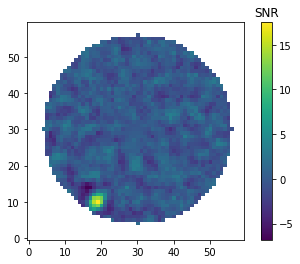

In [11]:
img = b/np.sqrt(a)
plt.imshow(img.T, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('SNR')

In [ ]:
plt.imshow(b.T, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('Flux')

In [ ]:
plt.imshow((1/np.sqrt(a)).T, origin='lower', vmax=.25)

clb = plt.colorbar()

## PCA

In [ ]:
data_pca = fits.getdata(os.path.join(path_data, "PSFsub_mask0.05.fits"))

In [ ]:
plt.imshow(data_pca[6], origin='lower')

clb = plt.colorbar()
